In [62]:
import pandas as pd 
import seaborn as sns 

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df.groupby(['Family_size'],as_index=False)['Survived'].agg(['count','mean'])

,Family_size,count,mean
0,1,537,0.303538
1,2,161,0.552795
2,3,102,0.578431
3,4,29,0.724138
4,5,15,0.200000
5,6,22,0.136364
6,7,12,0.333333
7,8,6,0.000000
8,11,7,0.000000


In [65]:
train_df['fam_type'] = pd.cut(train_df.Family_size,[0,1,4,7,11],labels=['solo','small','medium','big'])
test_df['fam_type'] = pd.cut(test_df.Family_size,[0,1,4,7,11],labels=['solo','small','medium','big'])
train_df.groupby(['fam_type'],as_index=False)['Survived'].agg(['count','mean'])

C:\Users\wbjee\AppData\Local\Temp\ipykernel_9768\1957071465.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['fam_type'],as_index=False)['Survived'].agg(['count','mean'])


,fam_type,count,mean
0,solo,537,0.303538
1,small,292,0.578767
2,medium,49,0.204082
3,big,13,0.000000


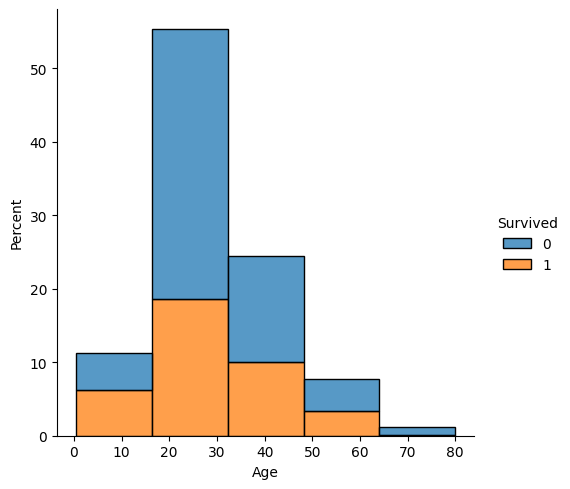

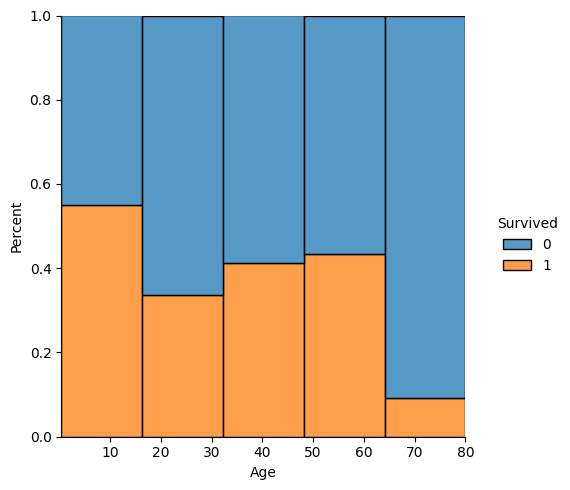

In [66]:

train_df['Age'] = train_df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

test_df['Age'] = test_df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

sns.displot(train_df, x='Age', hue='Survived', binwidth=17,
            height=5, multiple='stack', stat='percent')

sns.displot(train_df, x='Age', hue='Survived', binwidth=17,
            height=5, multiple='fill', stat='percent')


In [67]:
def encodeAge(train):
    train.loc[train['Age'] <= 17, 'Age'] = 0
    train.loc[(train['Age'] > 17) & (train['Age'] <= 32), 'Age'] = 1
    train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
    train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
    train.loc[(train['Age'] > 64) & (train['Age'] <= 80), 'Age'] = 4

encodeAge(train_df)

def encodeAge(test):
    test.loc[test['Age'] <= 17, 'Age'] = 0
    test.loc[(test['Age'] > 17) & (test['Age'] <= 32), 'Age'] = 1
    test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
    test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
    test.loc[(test['Age'] > 64) & (test['Age'] <= 80), 'Age'] = 4

encodeAge(test_df)


In [68]:
train_df.groupby(['Age'],as_index=False)['Survived'].mean()

,Age,Survived
0,0.0,0.539823
1,1.0,0.333333
2,2.0,0.412844
3,3.0,0.434783
4,4.0,0.090909


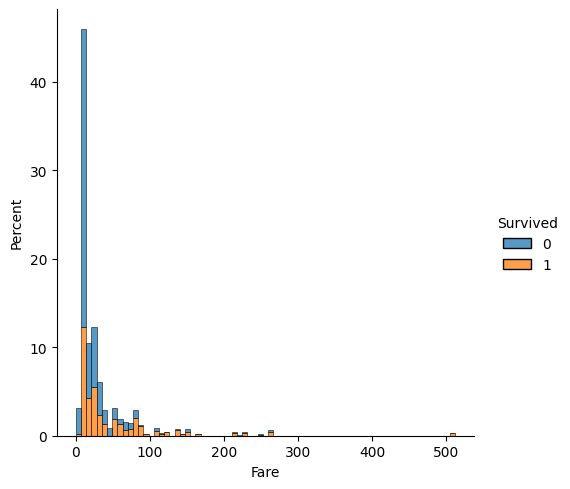

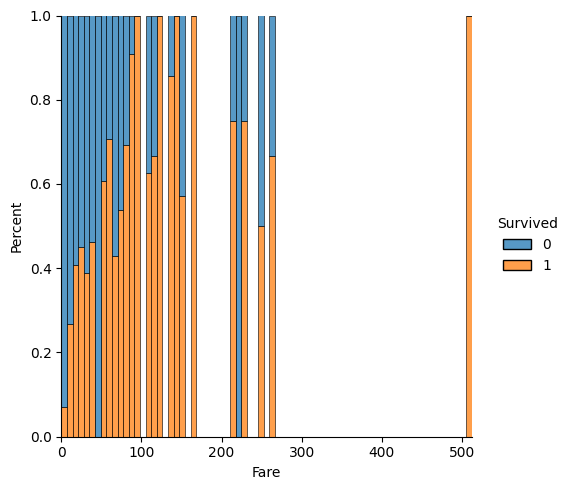

In [69]:
sns.displot(train_df, x='Fare', hue='Survived',
            binwidth=7, height=5, multiple='stack', stat='percent')

sns.displot(train_df, x='Fare', hue='Survived',
            binwidth=7, height=5, multiple='fill', stat='percent')


In [70]:
def encodeFare(train):
    train.loc[train['Fare'] <= 7, 'Fare'] = 0
    train.loc[(train['Fare'] > 7) & (train['Fare'] <= 14), 'Fare'] = 1
    train.loc[(train['Fare'] > 14) & (train['Fare'] <= 42.0), 'Fare'] = 2
    train.loc[(train['Fare'] > 42.0) & (train['Fare'] <= 512.329), 'Fare'] = 3

encodeFare(train_df)

def encodeFare(test):
    test.loc[test['Fare'] <= 7, 'Fare'] = 0
    test.loc[(test['Fare'] > 7) & (test['Fare'] <= 14), 'Fare'] = 1
    test.loc[(test['Fare'] > 14) & (test['Fare'] <= 42.0), 'Fare'] = 2
    test.loc[(test['Fare'] > 42.0) & (test['Fare'] <= 512.329), 'Fare'] = 3

encodeFare(test_df)



In [71]:
train_df.groupby(['Fare'], as_index=False)['Survived'].agg(['count', 'mean'])


,Fare,count,mean
0,0.0000,28,0.071429
1,1.0000,409,0.266504
2,2.0000,282,0.425532
3,3.0000,169,0.639053
4,512.3292,3,1.000000


In [72]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [73]:
# Extract Title from Name column in train_df
train_df['Title'] = train_df['Name'] \
    .str.split(pat=",", expand=True)[1] \
    .str.split(pat=".", expand=True)[0] \
    .apply(lambda x: x.strip())

# Extract Title from Name column in test_df
test_df['Title'] = test_df['Name'] \
    .str.split(pat=",", expand=True)[1] \
    .str.split(pat=".", expand=True)[0] \
    .apply(lambda x: x.strip())


In [74]:
train_df.groupby(['Title'],as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


In [75]:
# === TRAIN DF TITLE CLEANING ===
train_df['Title'] = train_df['Title'].replace(['Capt', 'Col', 'Major', 'Rev', 'Dr'], 'Officers')
train_df['Title'] = train_df['Title'].replace(['Mrs', 'Mme'], 'Mrs')
train_df['Title'] = train_df['Title'].replace(['Miss', 'Ms', 'Mlle'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Master'], 'Master')
train_df['Title'] = train_df['Title'].replace(['Lady', 'the Countess', 'Sir', 'Jonkheer', 'Don'], 'VIP')
train_df['Title'] = train_df['Title'].replace(['Mr'], 'Mr')

# === TEST DF TITLE CLEANING ===
test_df['Title'] = test_df['Title'].replace(['Capt', 'Col', 'Major', 'Rev', 'Dr'], 'Officers')
test_df['Title'] = test_df['Title'].replace(['Mrs', 'Mme'], 'Mrs')
test_df['Title'] = test_df['Title'].replace(['Miss', 'Ms', 'Mlle'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Master'], 'Master')
test_df['Title'] = test_df['Title'].replace(['Lady', 'the Countess', 'Sir', 'Jonkheer', 'Don'], 'VIP')
test_df['Title'] = test_df['Title'].replace(['Mr'], 'Mr')


In [76]:
train_df.groupby(['Title'],as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Master,40,0.575000
1,Miss,185,0.702703
2,Mr,517,0.156673
3,Mrs,126,0.793651
4,Officers,18,0.277778
5,VIP,5,0.600000


In [77]:
# Fill missing Embarked values with mode
train_df.Embarked = train_df.Embarked.fillna(train_df.Embarked.mode()[0])
test_df.Embarked = test_df.Embarked.fillna(test_df.Embarked.mode()[0])

# Show all columns
train_df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'fam_type', 'Title'],
      dtype='object')

In [78]:
train_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'FamilySize', 'Cabin'],
              axis=1, inplace=True, errors='ignore')

test_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'FamilySize', 'Cabin'],
             axis=1, inplace=True, errors='ignore')

train_df.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,fam_type,Title
0,0,3,male,1.0,1.0,S,2,small,Mr
1,1,1,female,2.0,3.0,C,2,small,Mrs
2,1,3,female,1.0,1.0,S,1,solo,Miss
3,1,1,female,2.0,3.0,S,2,small,Mrs
4,0,3,male,2.0,1.0,S,1,solo,Mr


In [79]:
from sklearn.preprocessing import LabelEncoder

# Train data encoding
train_df["Sex"] = LabelEncoder().fit_transform(train_df["Sex"])
train_df["Embarked"] = LabelEncoder().fit_transform(train_df["Embarked"])
train_df["fam_type"] = LabelEncoder().fit_transform(train_df["fam_type"])
train_df["Title"] = LabelEncoder().fit_transform(train_df["Title"])

# Test data encoding
test_df["Sex"] = LabelEncoder().fit_transform(test_df["Sex"])
test_df["Embarked"] = LabelEncoder().fit_transform(test_df["Embarked"])
test_df["fam_type"] = LabelEncoder().fit_transform(test_df["fam_type"])
test_df["Title"] = LabelEncoder().fit_transform(test_df["Title"])


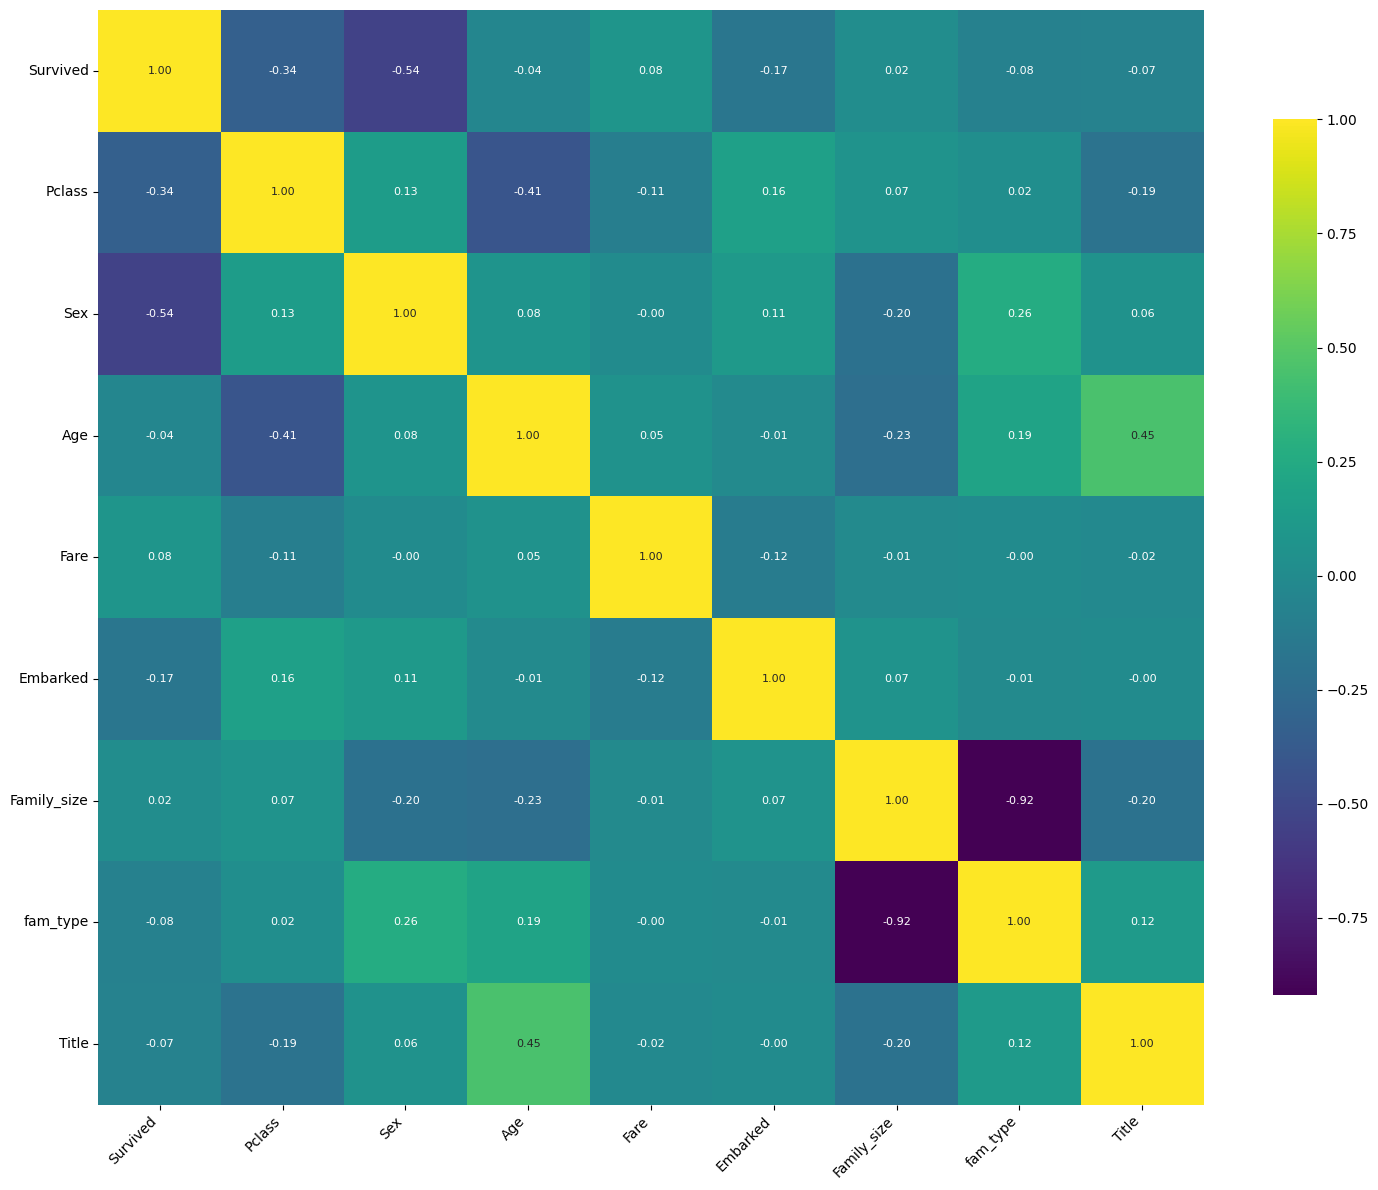

In [80]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)

# Adjust the figure size and font properties for better readability
plt.figure(figsize=(15, 12))   # Increase figure size

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    annot_kws={"size": 8},        # Smaller font size for annotations
    cbar_kws={"shrink": 0.8}      # Shrink color bar size
)

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()   # Adjust layout for better fit
plt.show()


In [81]:
train_df = train_df.loc[:, [
    'Survived', 'Pclass', 'Sex', 'Embarked', 'Age',
    'Fare', 'fam_type', 'Title'
]]

test_df = test_df.loc[:, [
    'Pclass', 'Sex', 'Embarked', 'Age',
    'Fare', 'fam_type', 'Title'
]]


In [82]:
# Splitting features (X) and target (y)
X = train_df.iloc[:, 1:].values   # All columns except Survived
y = train_df.iloc[:, 0].values    # Survived column only

# Train–test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


In [83]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rfc = RandomForestClassifier(max_depth=10, n_estimators=200)

# Train the model
rf_model = rfc.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [84]:
# Predict on test data
y_pred = rf_model.predict(test_df)

# Load original test.csv to get PassengerId
test_data = pd.read_csv("test.csv")
a = test_data.iloc[:, 0].values    # PassengerId

# Create submission dictionary
output_dict = {
    'PassengerId': a,
    'Survived': y_pred
}

# Convert to DataFrame
df1 = pd.DataFrame(output_dict)

# Save as CSV
df1.to_csv('titanic1.csv', index=False)


c:\Users\wbjee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
